<a href="https://colab.research.google.com/github/hayato-miura/Python_high_frequency/blob/main/memo7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re

def get_front_and_rear(text):
    text = text.split()
    if len(text) > 2:
        return (text[-2], text[-1])
    elif len(text) == 2:
        return (text[0], text[1])
    elif len(text):
        text = text[0]
        check_split = ["-", "/", "／", "ー", "－", ".", "・", "･", "、"]
        for sp in check_split:
            if sp in text:
                front, rear = text.split(sp)[0], text.split(sp)[1]
                return (front, rear)
        else:
            return ("", "")
    else:
        return ("", "")

def zenkaku_to_hankaku(text):
    return text.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))

def ordformat(text):
    categories = [
        ("car_info", "車両情報"),
        ("first_reg", "初年度登録"),
        ("car_num", "車体番号"),
        ("model", "型式"),
        ("engine", "原動機"),
        ("model_spec", "型式指定番号・類別区分番号"),
        ("used_or_rebuilt", "中古かリビルトか"),
        ("staff_name", "スタッフ様名")
    ]
    obj = {}
    lines = text.split("\n")
    for line in lines:
        for key, category in categories:
            if line.startswith(category):
                value = line.split("：")[1].strip()
                value = zenkaku_to_hankaku(value)
                if key == "model_spec":
                    obj["kata"], obj["rui"] = get_front_and_rear(value)
                else:
                    obj[key] = value
    return obj

# サンプルのLINEメッセージ
line_message = """
車両情報：トヨタ
初年度登録：2020年
車体番号：12345ABC
型式：ABC123
原動機：V6
型式指定番号・類別区分番号:1234-5678
中古かリビルトか：中古
スタッフ様名:山田
"""

# メッセージをフォーマットしてオブジェクトを取得
formatted_obj = ordformat(line_message)
print(formatted_obj)



IndexError: list index out of range

In [ ]:
import re

def get_front_and_rear(text):
    text = text.split()
    if len(text) > 2:
        return (text[-2], text[-1])
    elif len(text) == 2:
        return (text[0], text[1])
    elif len(text):
        text = text[0]
        check_split = ["-", "/", "／", "ー", "－", ".", "・", "･", "、"]
        for sp in check_split:
            if sp in text:
                front, rear = text.split(sp)[0], text.split(sp)[1]
                return (front, rear)
        else:
            return ("", "")
    else:
        return ("", "")

def zenkaku_to_hankaku(text):
    return text.translate(str.maketrans({chr(0xFF01 + i): chr(0x21 + i) for i in range(94)}))

def ordformat(text):
    categories = [
        ("car_info", "車両情報"),
        ("first_reg", "初年度登録"),
        ("car_num", "車体番号"),
        ("model", "型式"),
        ("engine", "原動機"),
        ("model_spec", "型式指定番号・類別区分番号"),
        ("used_or_rebuilt", "中古かリビルトか"),
        ("staff_name", "スタッフ様名")
    ]
    obj = {}
    lines = text.split("\n")
    for line in lines:
        for key, category in categories:
            if line.startswith(category):
                parts = line.split("：")
                if len(parts) > 1:
                    value = parts[1].strip()
                    value = zenkaku_to_hankaku(value)
                    if key == "model_spec":
                        obj["kata"], obj["rui"] = get_front_and_rear(value)
                    else:
                        obj[key] = value
    return obj

# サンプルのLINEメッセージ
line_message = """
車両情報：トヨタ
初年度登録：2020年
車体番号：12345ABC
型式：ABC123
原動機：V6
型式指定番号・類別区分番号:1234-5678
中古かリビルトか：中古
スタッフ様名:山田
"""

# メッセージをフォーマットしてオブジェクトを取得
formatted_obj = ordformat(line_message)
print(formatted_obj)


{'car_info': 'トヨタ', 'first_reg': '2020年', 'car_num': '12345ABC', 'model': 'ABC123', 'engine': 'V6', 'used_or_rebuilt': '中古'}


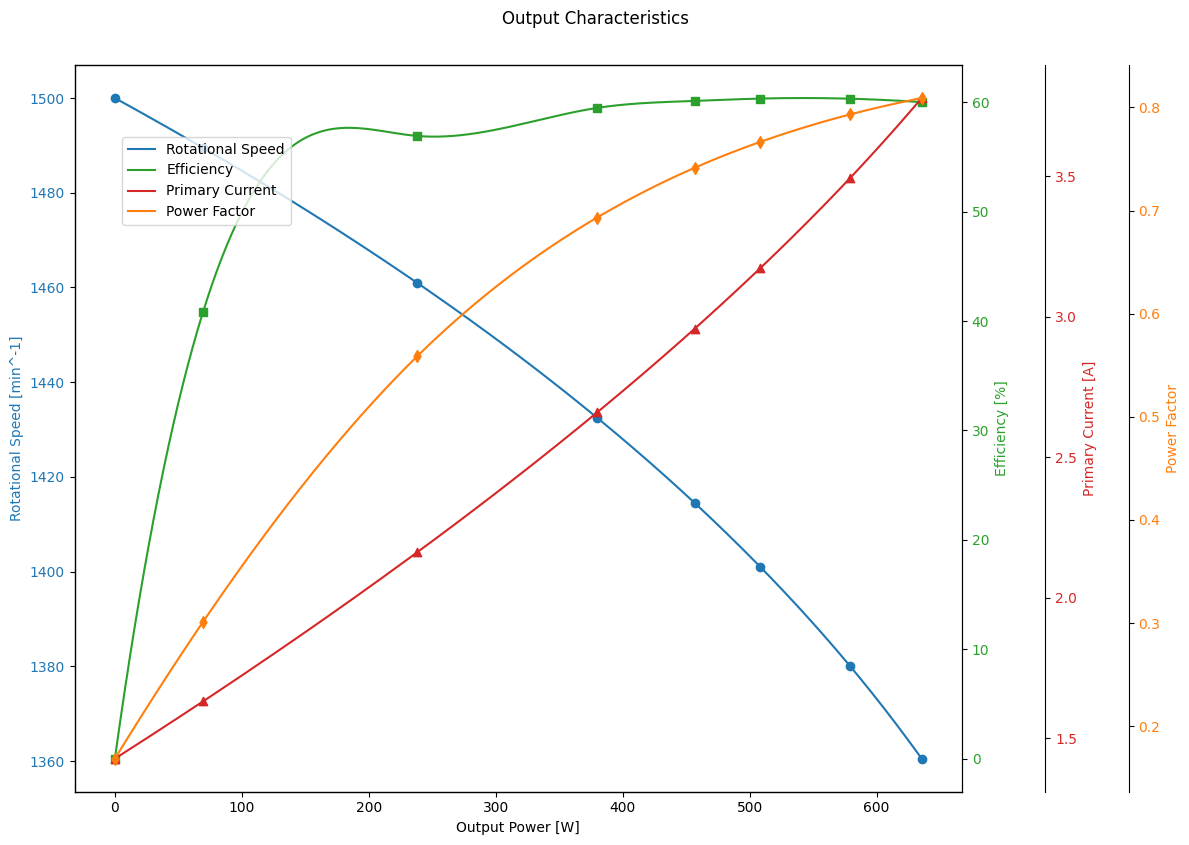

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# データの準備
output_power = np.array([1.01911E-06, 69.33872584, 238.0040301, 379.8621987, 456.7480287, 508.4266916, 579.3273758, 635.606648])
rotational_speed = np.array([1500, 1489.5, 1461, 1432.5, 1414.5, 1401, 1380, 1360.5])
efficiency = np.array([1.22361E-06, 40.78631244, 56.91852942, 59.47739221, 60.1166399, 60.33216191, 60.32013724, 60.00425218])
primary_current = np.array([1.426579614, 1.630322222, 2.161125433, 2.659506011, 2.957806209, 3.173335608, 3.49497065, 3.779198547])
power_factor = np.array([0.168535264, 0.301021381, 0.55854741, 0.693238318, 0.741517908, 0.766607081, 0.793281953, 0.809125841])

# 補間用のスムーズなカーブの作成
output_power_smooth = np.linspace(output_power.min(), output_power.max(), 500)
rotational_speed_smooth = make_interp_spline(output_power, rotational_speed)(output_power_smooth)
efficiency_smooth = make_interp_spline(output_power, efficiency)(output_power_smooth)
primary_current_smooth = make_interp_spline(output_power, primary_current)(output_power_smooth)
power_factor_smooth = make_interp_spline(output_power, power_factor)(output_power_smooth)

# グラフの作成
fig, ax1 = plt.subplots(figsize=(12, 8))

# 出力電力を横軸
ax1.set_xlabel('Output Power [W]')

# 回転速度を左縦軸に設定
ax1.set_ylabel('Rotational Speed [min^-1]', color='tab:blue')
ax1.plot(output_power_smooth, rotational_speed_smooth, color='tab:blue', label='Rotational Speed')
ax1.scatter(output_power, rotational_speed, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 効率を追加
ax2 = ax1.twinx()
ax2.set_ylabel('Efficiency [%]', color='tab:green')
ax2.plot(output_power_smooth, efficiency_smooth, color='tab:green', label='Efficiency')
ax2.scatter(output_power, efficiency, color='tab:green', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:green')

# 一次電流を追加
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Primary Current [A]', color='tab:red')
ax3.plot(output_power_smooth, primary_current_smooth, color='tab:red', label='Primary Current')
ax3.scatter(output_power, primary_current, color='tab:red', marker='^')
ax3.tick_params(axis='y', labelcolor='tab:red')

# 力率を追加
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.set_ylabel('Power Factor', color='tab:orange')
ax4.plot(output_power_smooth, power_factor_smooth, color='tab:orange', label='Power Factor')
ax4.scatter(output_power, power_factor, color='tab:orange', marker='d')
ax4.tick_params(axis='y', labelcolor='tab:orange')

# グラフのレイアウトを調整
fig.tight_layout()
fig.suptitle('Output Characteristics', y=1.05)
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()


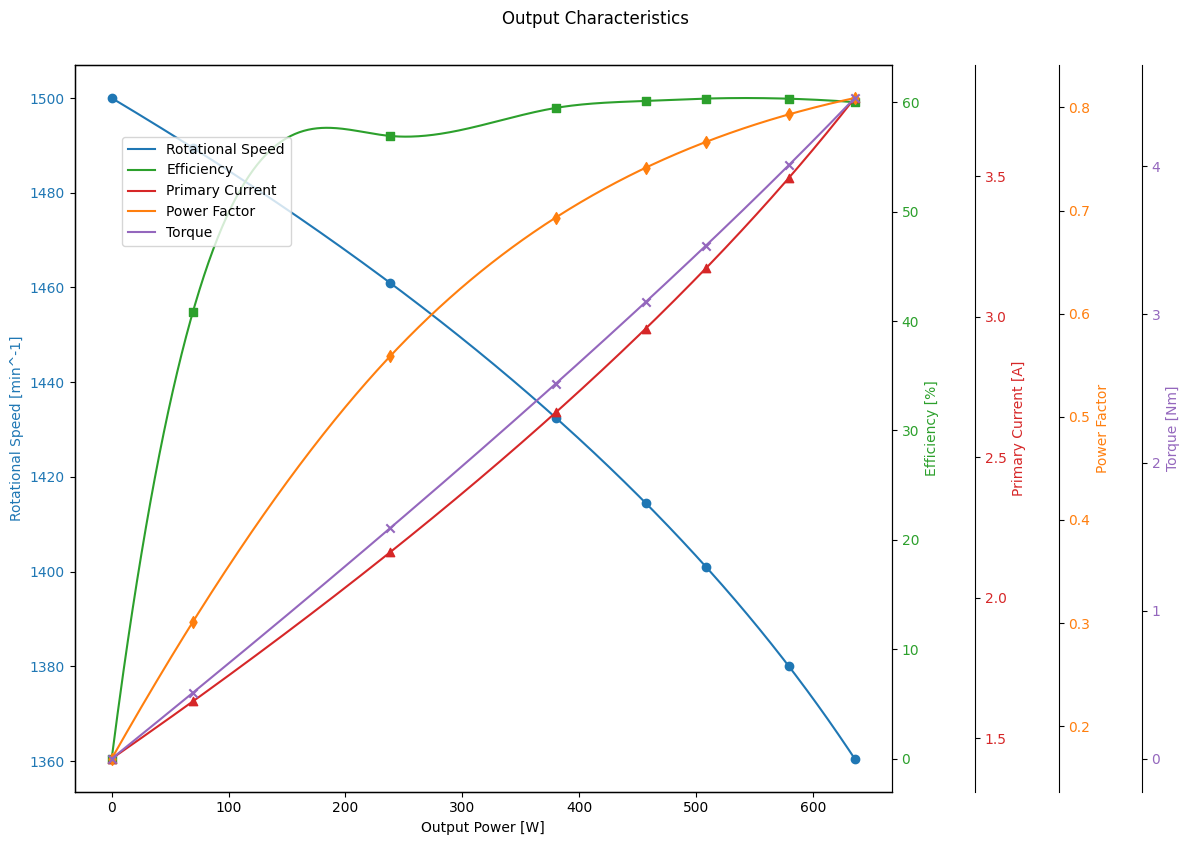

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# データの準備
output_power = np.array([1.01911E-06, 69.33872584, 238.0040301, 379.8621987, 456.7480287, 508.4266916, 579.3273758, 635.606648])
rotational_speed = np.array([1500, 1489.5, 1461, 1432.5, 1414.5, 1401, 1380, 1360.5])
efficiency = np.array([1.22361E-06, 40.78631244, 56.91852942, 59.47739221, 60.1166399, 60.33216191, 60.32013724, 60.00425218])
primary_current = np.array([1.426579614, 1.630322222, 2.161125433, 2.659506011, 2.957806209, 3.173335608, 3.49497065, 3.779198547])
power_factor = np.array([0.168535264, 0.301021381, 0.55854741, 0.693238318, 0.741517908, 0.766607081, 0.793281953, 0.809125841])
torque = np.array([6.48784E-09, 0.444535789, 1.555627017, 2.53222813, 3.08350823, 3.465465574, 4.008818067, 4.461298341])

# 補間用のスムーズなカーブの作成
output_power_smooth = np.linspace(output_power.min(), output_power.max(), 500)
rotational_speed_smooth = make_interp_spline(output_power, rotational_speed)(output_power_smooth)
efficiency_smooth = make_interp_spline(output_power, efficiency)(output_power_smooth)
primary_current_smooth = make_interp_spline(output_power, primary_current)(output_power_smooth)
power_factor_smooth = make_interp_spline(output_power, power_factor)(output_power_smooth)
torque_smooth = make_interp_spline(output_power, torque)(output_power_smooth)

# グラフの作成
fig, ax1 = plt.subplots(figsize=(12, 8))

# 出力電力を横軸
ax1.set_xlabel('Output Power [W]')

# 回転速度を左縦軸に設定
ax1.set_ylabel('Rotational Speed [min^-1]', color='tab:blue')
ax1.plot(output_power_smooth, rotational_speed_smooth, color='tab:blue', label='Rotational Speed')
ax1.scatter(output_power, rotational_speed, color='tab:blue', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# 効率を追加
ax2 = ax1.twinx()
ax2.set_ylabel('Efficiency [%]', color='tab:green')
ax2.plot(output_power_smooth, efficiency_smooth, color='tab:green', label='Efficiency')
ax2.scatter(output_power, efficiency, color='tab:green', marker='s')
ax2.tick_params(axis='y', labelcolor='tab:green')

# 一次電流を追加
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Primary Current [A]', color='tab:red')
ax3.plot(output_power_smooth, primary_current_smooth, color='tab:red', label='Primary Current')
ax3.scatter(output_power, primary_current, color='tab:red', marker='^')
ax3.tick_params(axis='y', labelcolor='tab:red')

# 力率を追加
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.set_ylabel('Power Factor', color='tab:orange')
ax4.plot(output_power_smooth, power_factor_smooth, color='tab:orange', label='Power Factor')
ax4.scatter(output_power, power_factor, color='tab:orange', marker='d')
ax4.tick_params(axis='y', labelcolor='tab:orange')

# トルクを追加
ax5 = ax1.twinx()
ax5.spines['right'].set_position(('outward', 180))
ax5.set_ylabel('Torque [Nm]', color='tab:purple')
ax5.plot(output_power_smooth, torque_smooth, color='tab:purple', label='Torque')
ax5.scatter(output_power, torque, color='tab:purple', marker='x')
ax5.tick_params(axis='y', labelcolor='tab:purple')

# グラフのレイアウトを調整
fig.tight_layout()
fig.suptitle('Output Characteristics', y=1.05)
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()


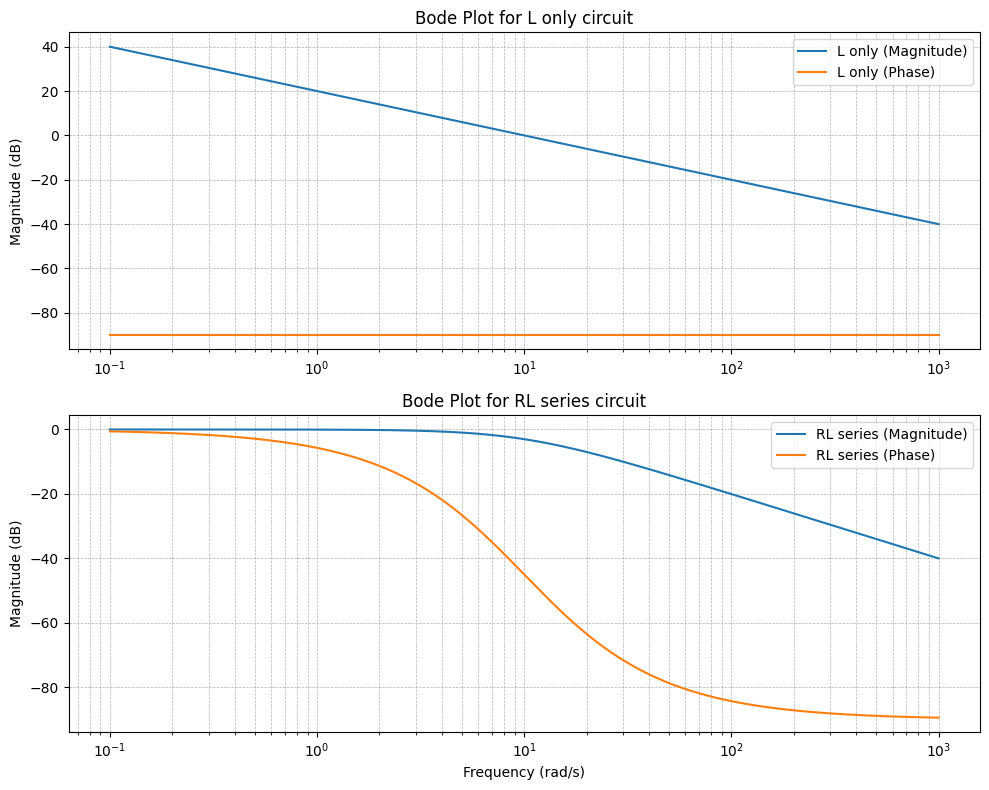

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# Lだけの回路の伝達関数
L = 0.1
num1 = [10]
den1 = [1, 0]
system1 = signal.TransferFunction(num1, den1)

# RL直列回路の伝達関数
R = 1
L = 0.1
num2 = [1]
den2 = [0.1, 1]
system2 = signal.TransferFunction(num2, den2)

# Bode plot
frequencies = np.logspace(-1, 3, 500)

w1, mag1, phase1 = signal.bode(system1, frequencies)
w2, mag2, phase2 = signal.bode(system2, frequencies)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Lだけの回路のボード線図
ax1.semilogx(w1, mag1, label='L only (Magnitude)')
ax1.semilogx(w1, phase1, label='L only (Phase)')

# RL直列回路のボード線図
ax2.semilogx(w2, mag2, label='RL series (Magnitude)')
ax2.semilogx(w2, phase2, label='RL series (Phase)')

# Labels and legends
ax1.set_title('Bode Plot for L only circuit')
ax1.set_ylabel('Magnitude (dB)')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.legend()

ax2.set_title('Bode Plot for RL series circuit')
ax2.set_ylabel('Magnitude (dB)')
ax2.set_xlabel('Frequency (rad/s)')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5)
ax2.legend()

plt.tight_layout()
plt.show()
